In [43]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
df=pd.read_csv("df_limpio.csv")
df.head()

,Unnamed: 0,id,nombre_del_alojamiento,id_del_anfitrion,nombre_del_anfitrion,nombre_de_la_ciudad,vecindario,latitud,longitud,tipo_de_cuarto,precio,mínimo_de_noches,numero_de_reseñas,última_reseña,reseñas_por_mes,cantidad_de_alojamientos,disponibilidad_al_año
0,0,2539,Clean & quiet apt home by the park,0,Anónimo,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9.0,2018-10-19,0.21,6,365.0
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45.0,2019-05-21,0.38,2,355.0
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0.0,0,0.00,1,365.0
3,3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270.0,2019-07-05,4.64,1,194.0
4,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,0.00000,-73.94399,Entire home/apt,80,10,9.0,2018-11-19,0.10,1,0.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47532 entries, 0 to 47531
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                47532 non-null  int64  
 1   id                        47532 non-null  int64  
 2   nombre_del_alojamiento    47532 non-null  object 
 3   id_del_anfitrion          47532 non-null  int64  
 4   nombre_del_anfitrion      47532 non-null  object 
 5   nombre_de_la_ciudad       47532 non-null  object 
 6   vecindario                47532 non-null  object 
 7   latitud                   47532 non-null  float64
 8   longitud                  47532 non-null  float64
 9   tipo_de_cuarto            47532 non-null  object 
 10  precio                    47532 non-null  int64  
 11  mínimo_de_noches          47532 non-null  int64  
 12  numero_de_reseñas         47532 non-null  float64
 13  última_reseña             47532 non-null  object 
 14  reseña

In [46]:
df_categorico=df[['nombre_del_alojamiento','nombre_de_la_ciudad','vecindario','tipo_de_cuarto','última_reseña']]

In [47]:
df_numeric=df[['id','id_del_anfitrion','latitud','longitud','precio','mínimo_de_noches','numero_de_reseñas','reseñas_por_mes','cantidad_de_alojamientos','disponibilidad_al_año']]

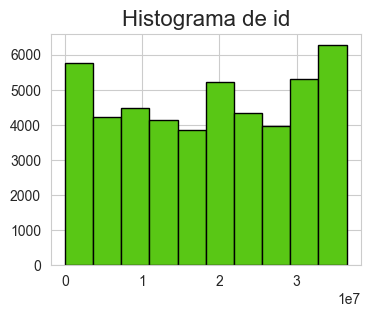

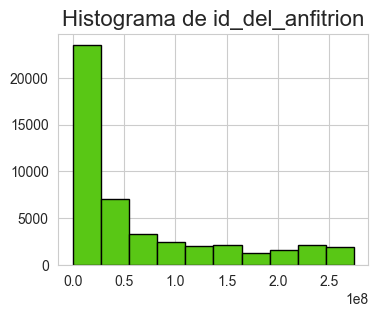

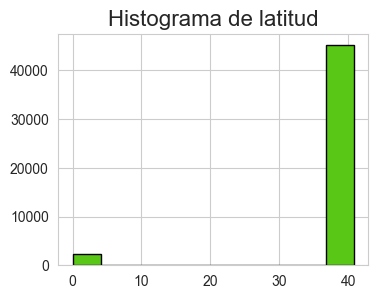

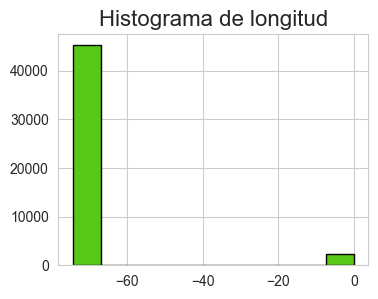

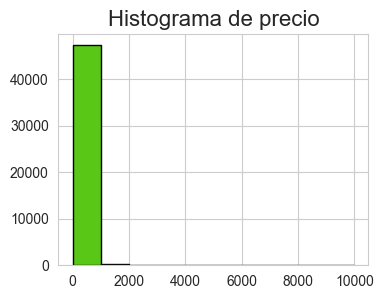

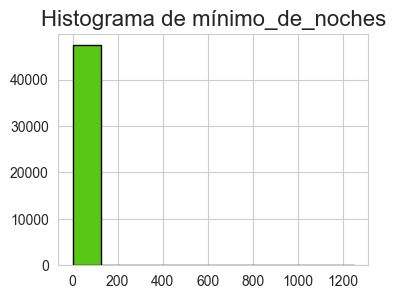

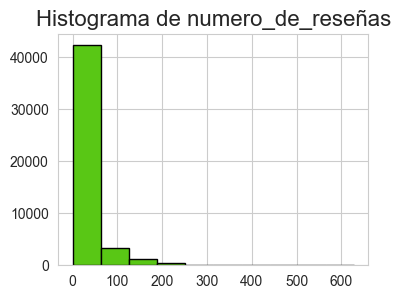

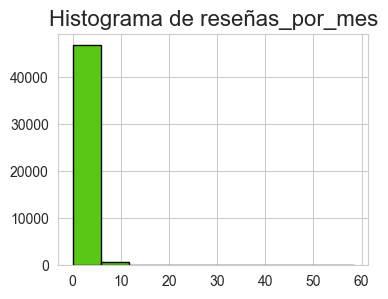

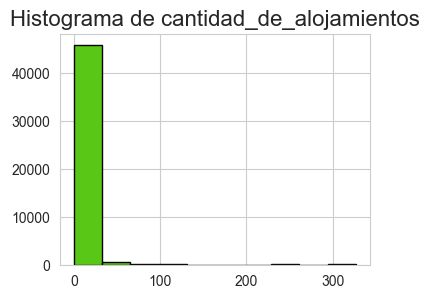

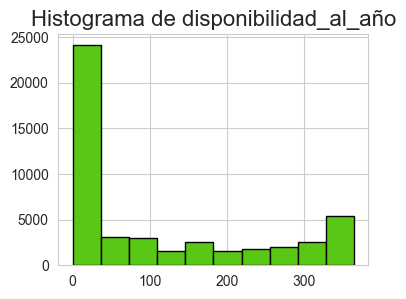

In [48]:
lista=df_numeric 
for i in lista:
    plt.figure(figsize=(4, 3))  
    plt.hist(df[i], bins=10, color="#59C715", edgecolor='black'); 
    plt.title(f'Histograma de {i}', fontsize=16)
    plt.show()

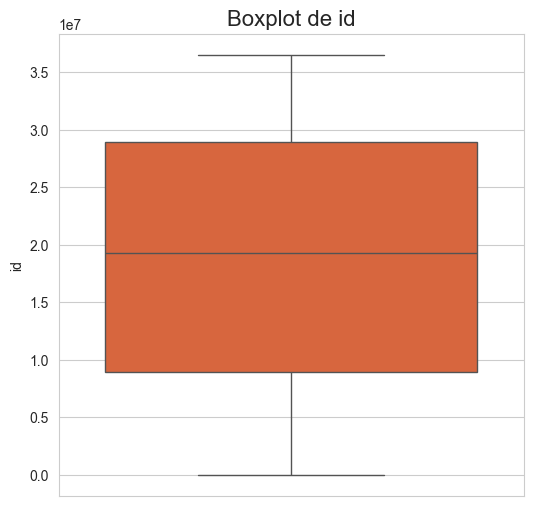

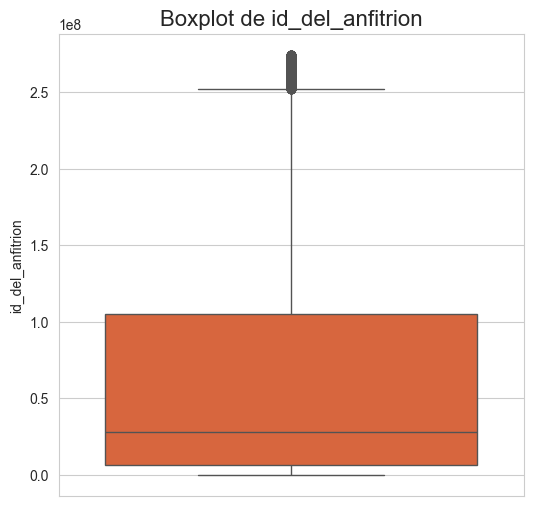

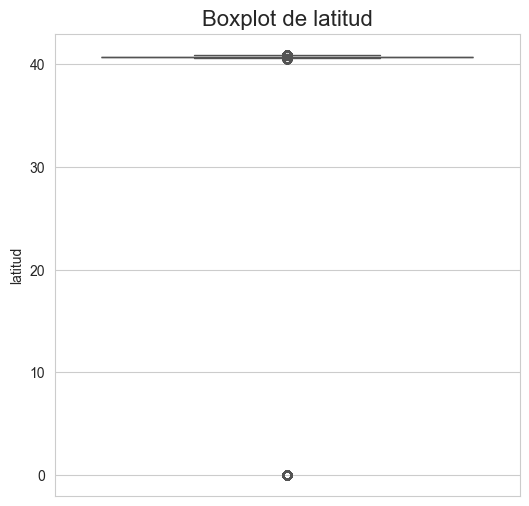

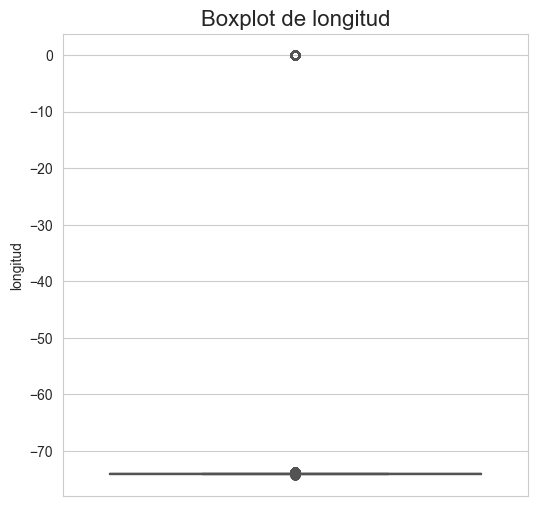

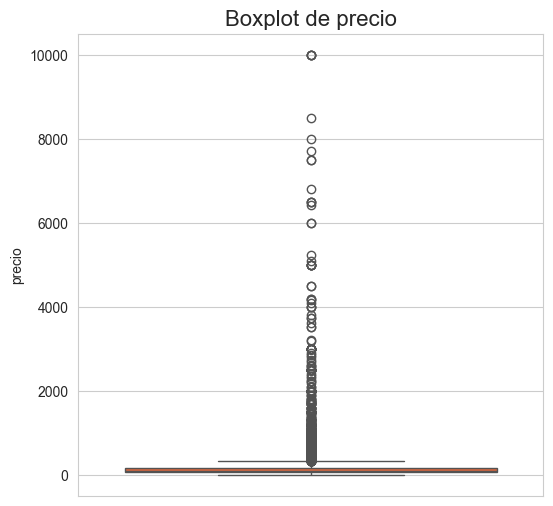

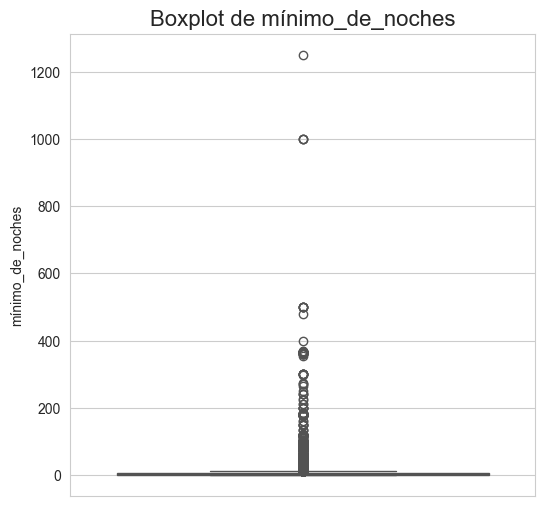

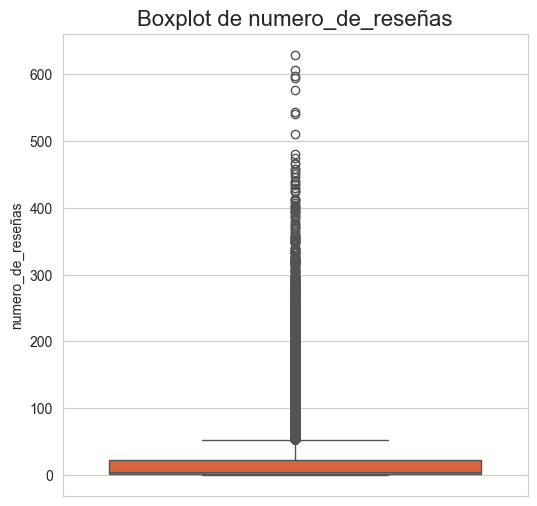

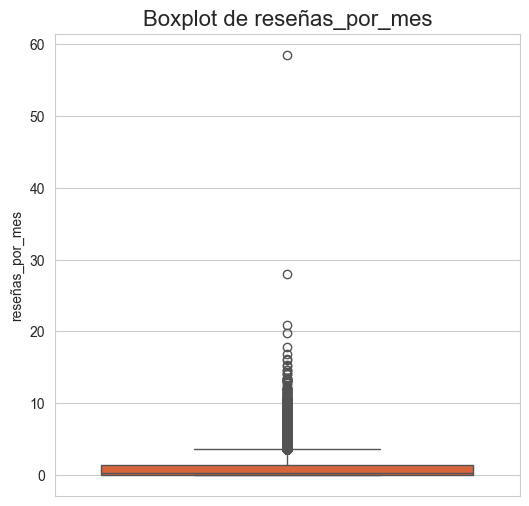

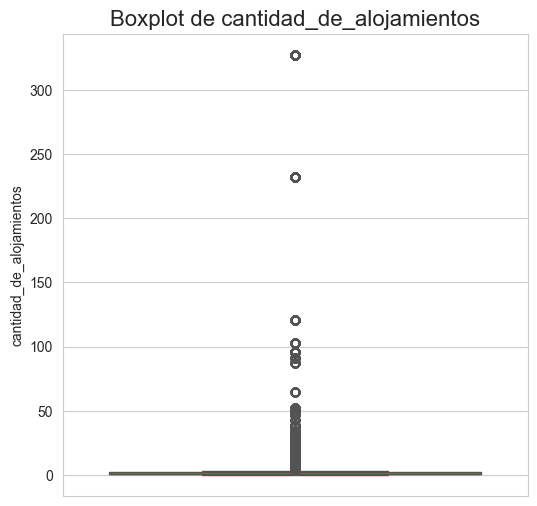

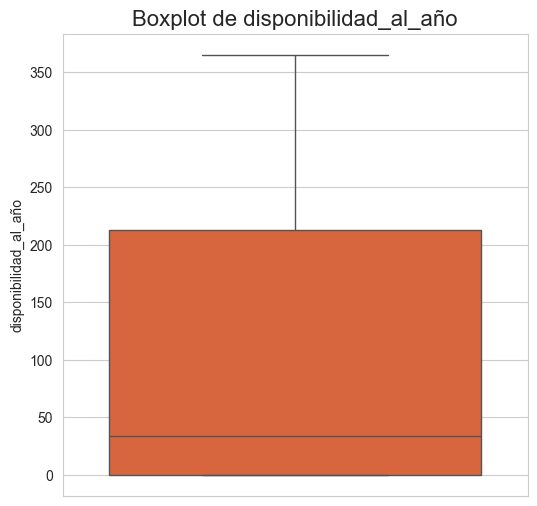

In [49]:
for i in lista:
    plt.figure(figsize=(6, 6))  
    sns.boxplot(y=df[i], color="#F15A24")
    plt.title(f'Boxplot de {i}', fontsize=16)
    plt.show()


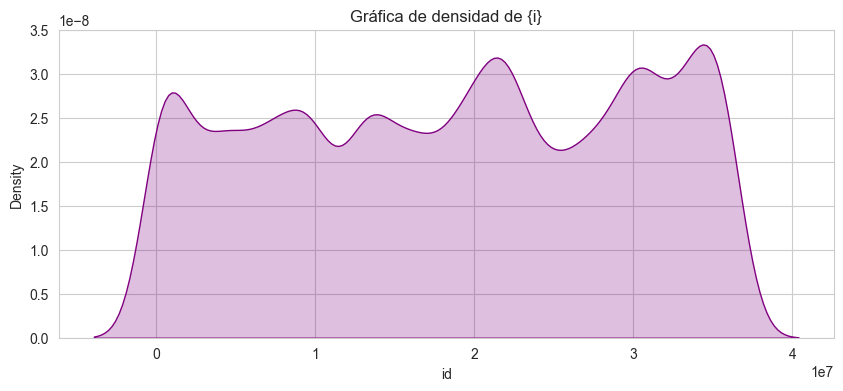

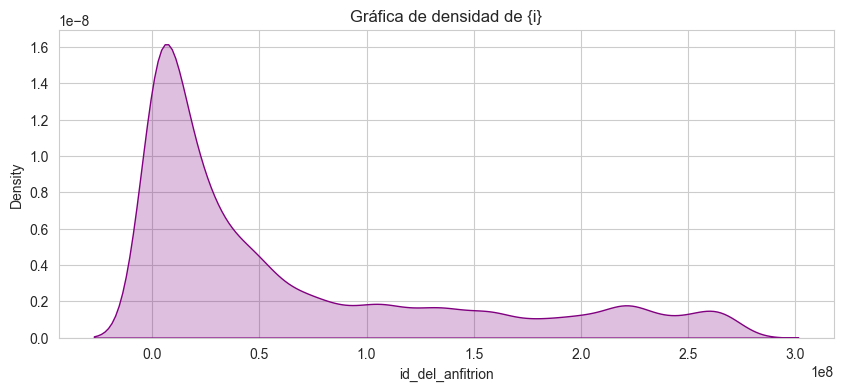

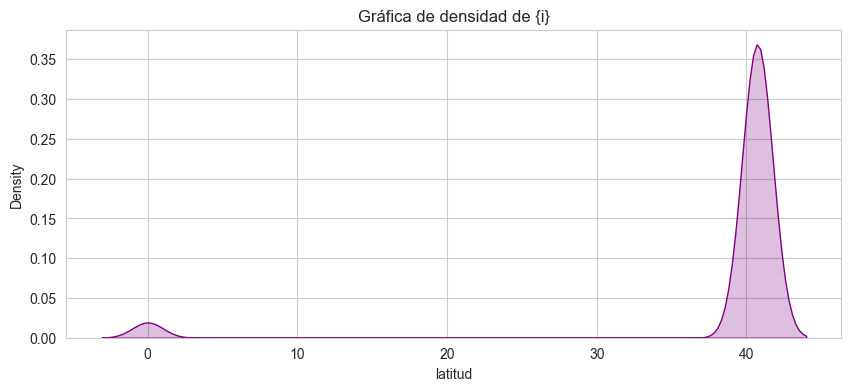

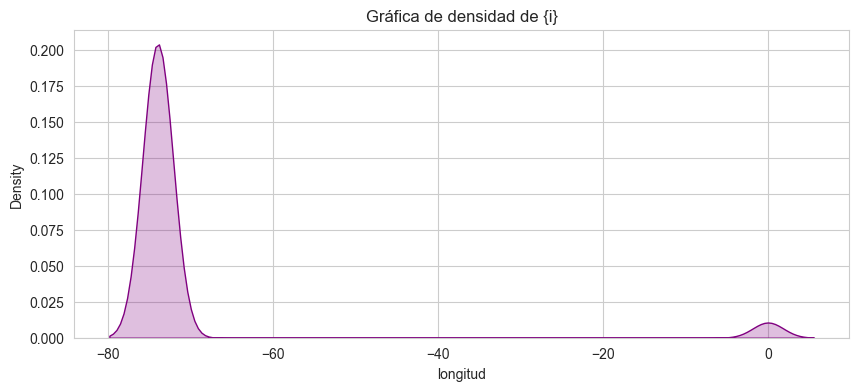

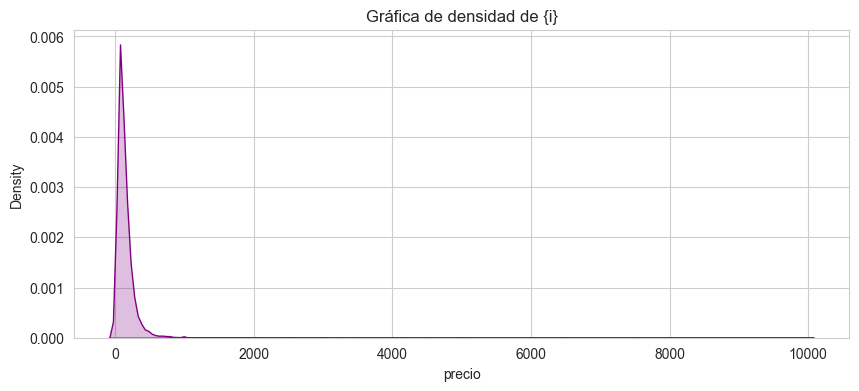

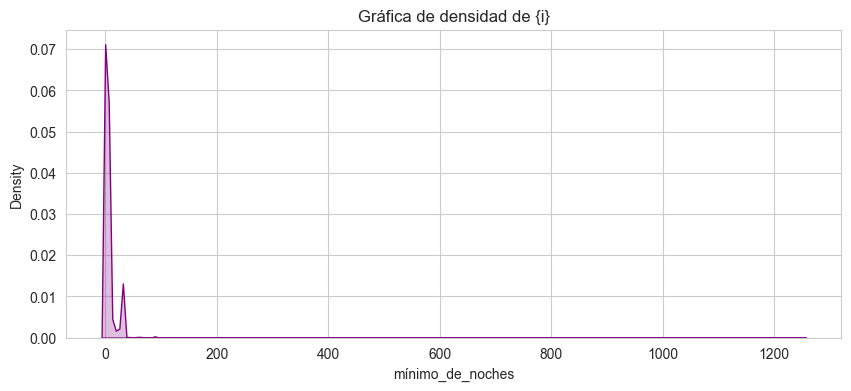

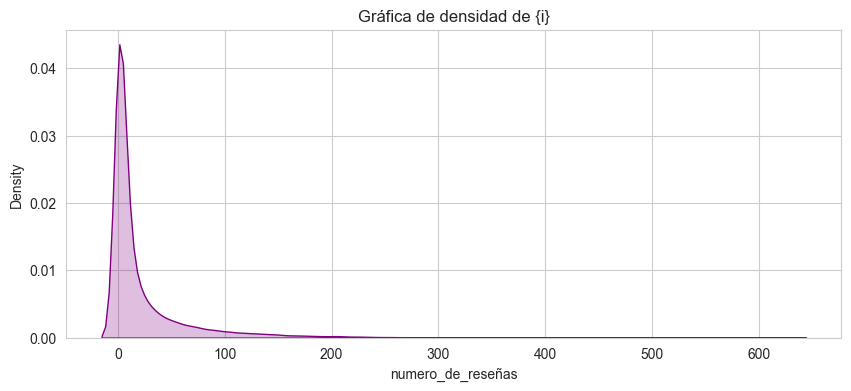

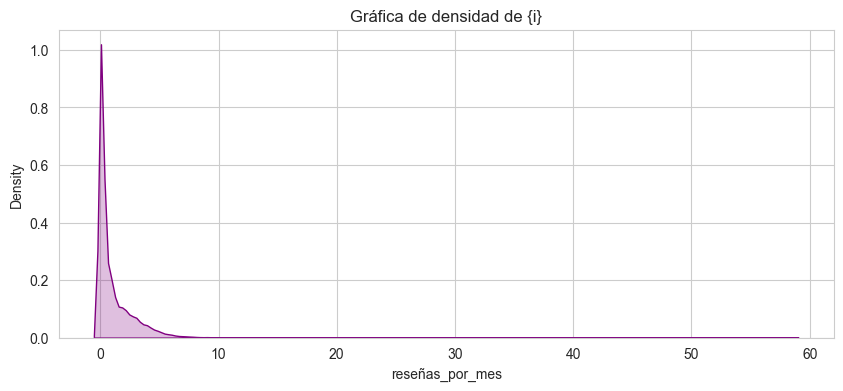

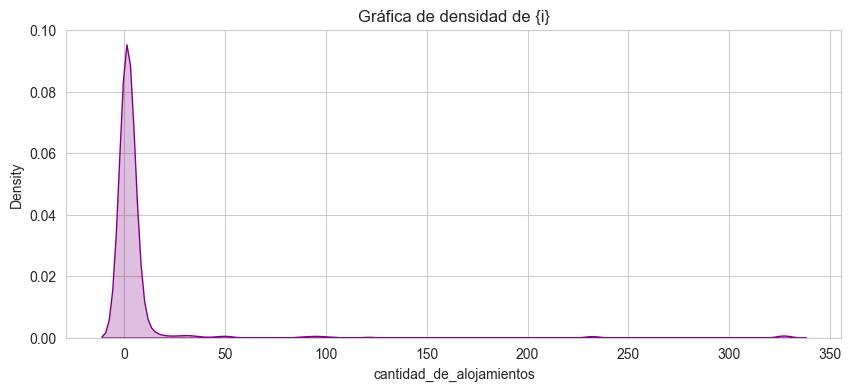

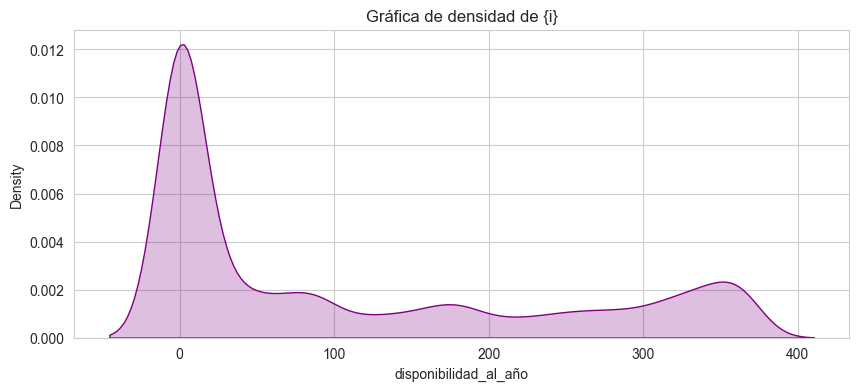

In [50]:
for i in lista:
    plt.figure(figsize=(10,4))
    sns.kdeplot(df[i], fill=True,color="purple")
    plt.title("Gráfica de densidad de {i}")
    sns.set_style("whitegrid")
    plt.show()

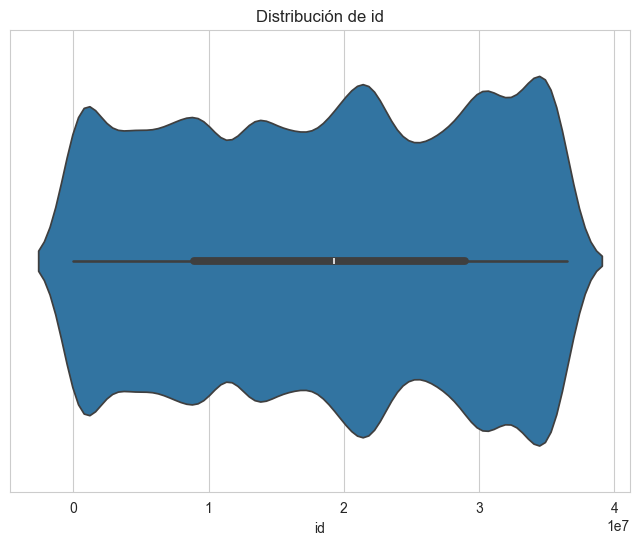

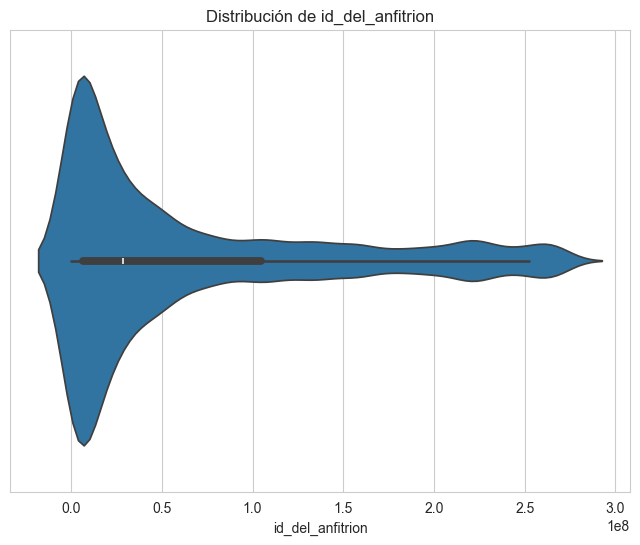

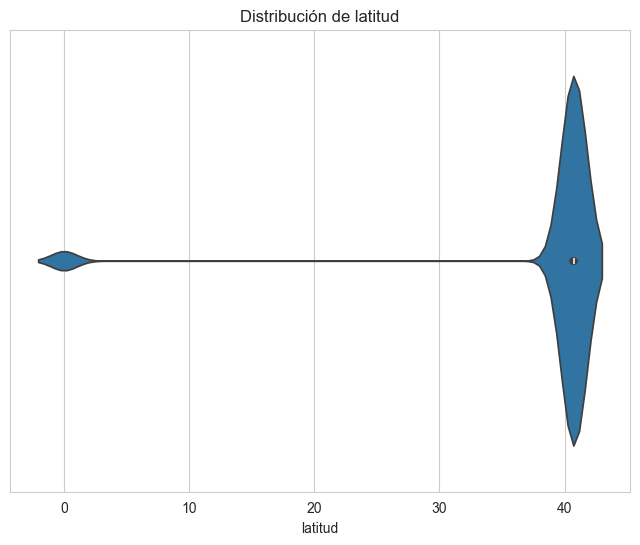

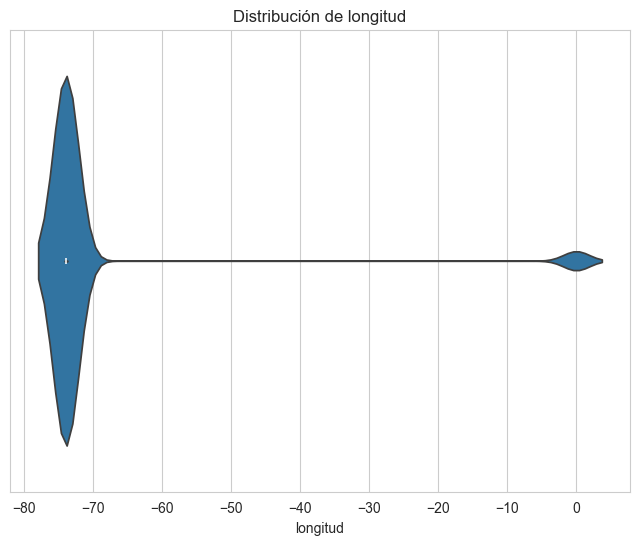

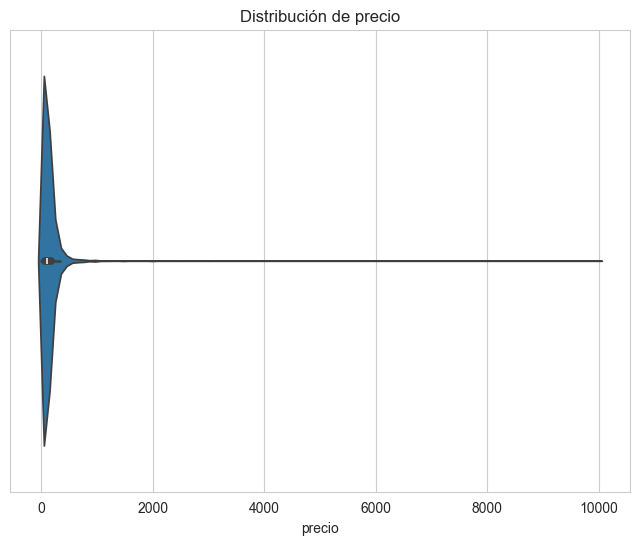

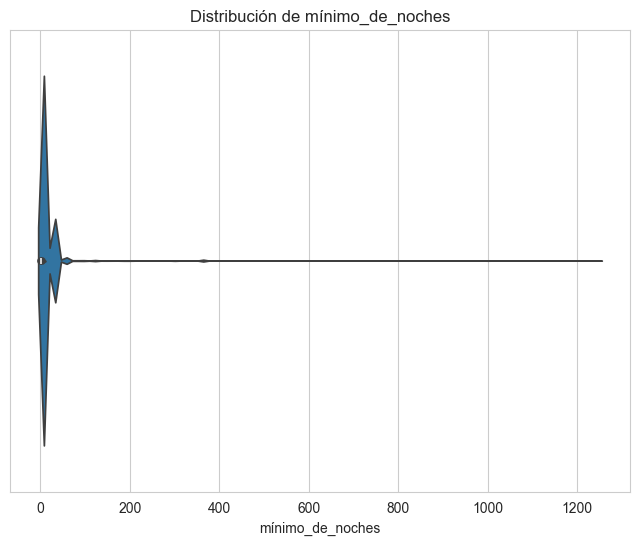

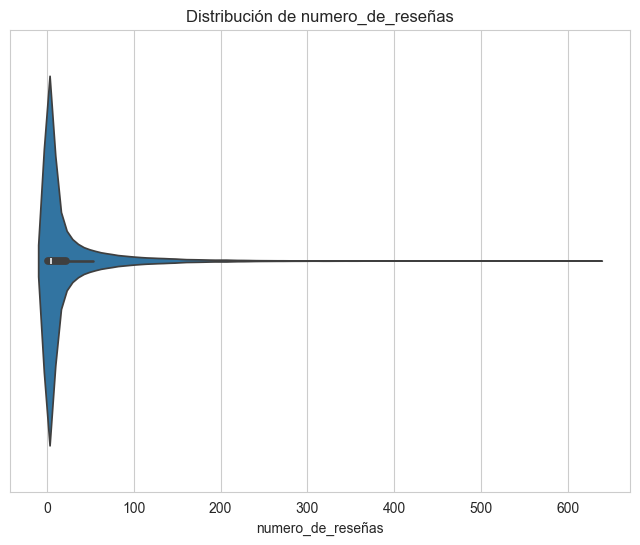

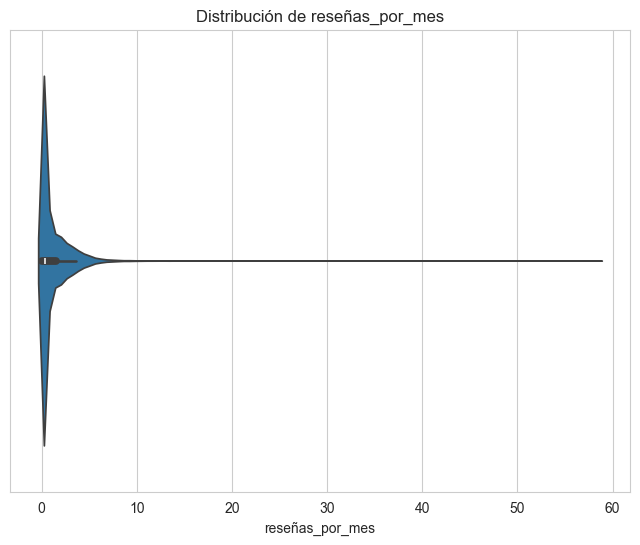

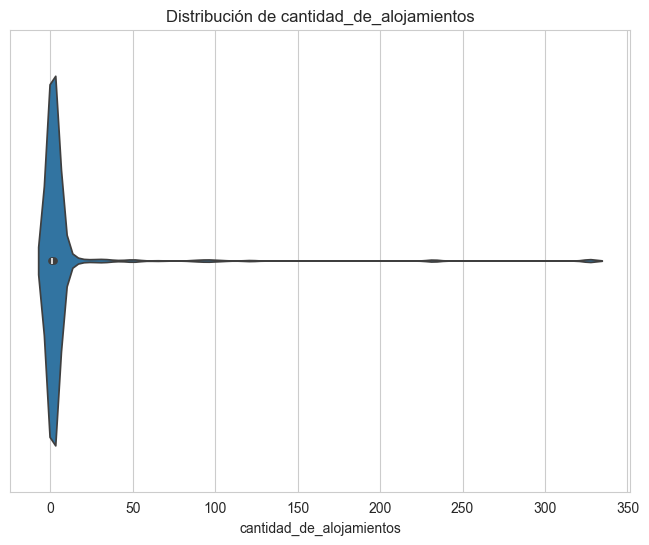

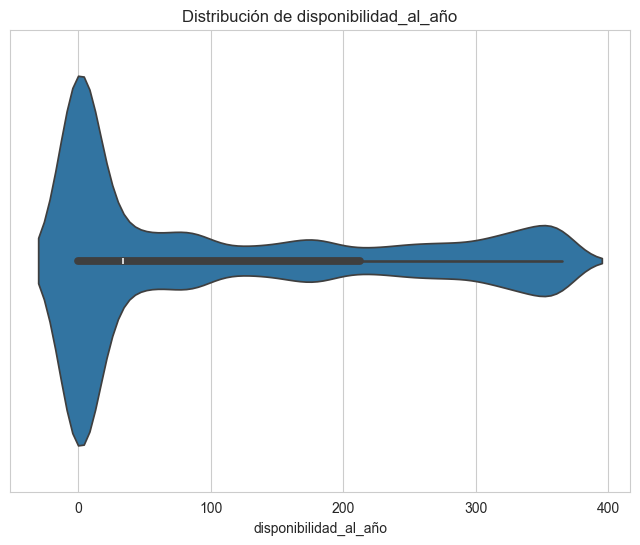

In [51]:
for i in lista:
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=i, data=df)
    plt.title(f'Distribución de {i}')
    plt.show()

In [52]:
lista2=df_categorico

C:\Users\orcar\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21333 (\N{CJK UNIFIED IDEOGRAPH-5355}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\orcar\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\orcar\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21452 (\N{CJK UNIFIED IDEOGRAPH-53CC}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\orcar\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\orcar\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph

ValueError: 
Dominiq's NY cosy 3bedrm crashpad*metro*wifi*$$ale
                                             ^
ParseException: Expected end of text, found '$'  (at char 45), (line:1, col:46)

<Figure size 600x300 with 1 Axes>

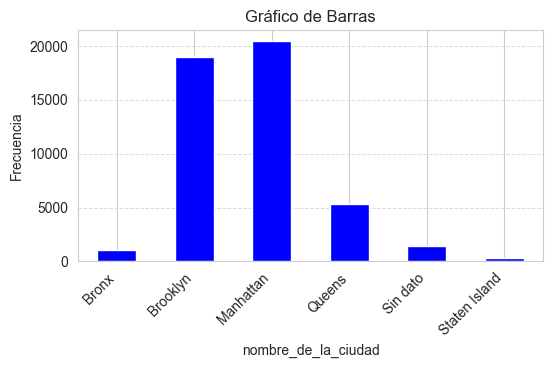

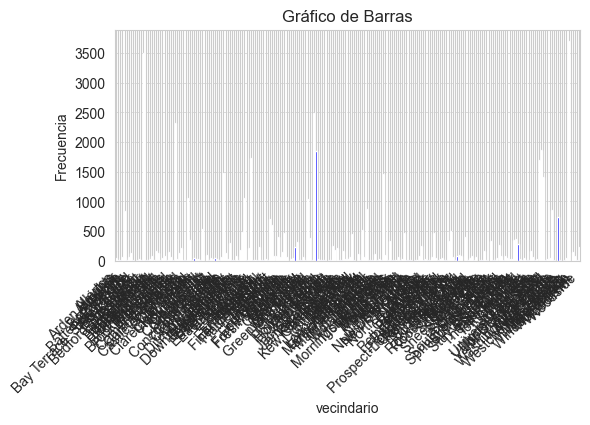

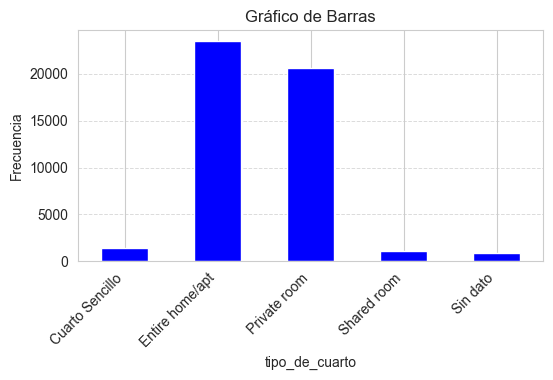

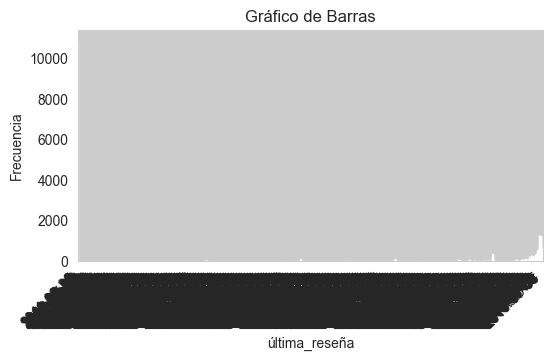

In [53]:
lista2=df_categorico
for i in lista2:
    plt.figure(figsize=(6, 3))
    df[i].value_counts().sort_index().plot(kind='bar', color='blue')
    plt.title('Gráfico de Barras')
    plt.xlabel(f'{i}')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
    plt.show()

C:\Users\orcar\AppData\Local\Temp\ipykernel_31712\1354272888.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['vecindario'].isin(top_vecindarios)], y='vecindario', order=top_vecindarios, palette='coolwarm')


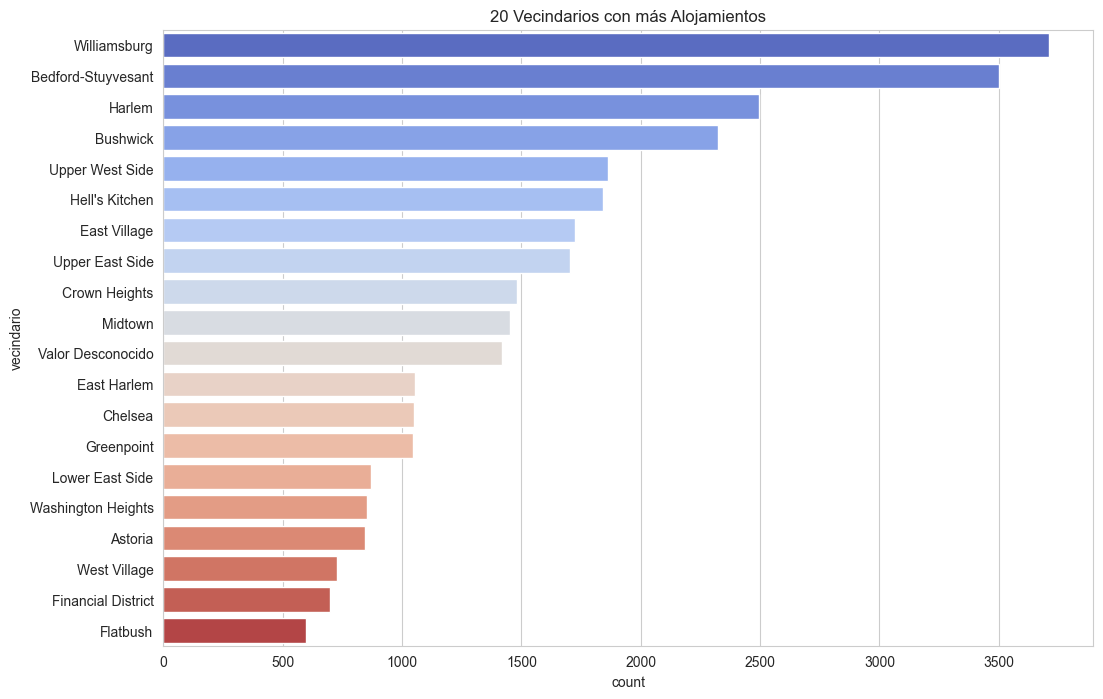

In [54]:
plt.figure(figsize=(12, 8))
top_vecindarios = df['vecindario'].value_counts().head(20).index
sns.countplot(data=df[df['vecindario'].isin(top_vecindarios)], y='vecindario', order=top_vecindarios, palette='coolwarm')
plt.title('20 Vecindarios con más Alojamientos')
plt.show()

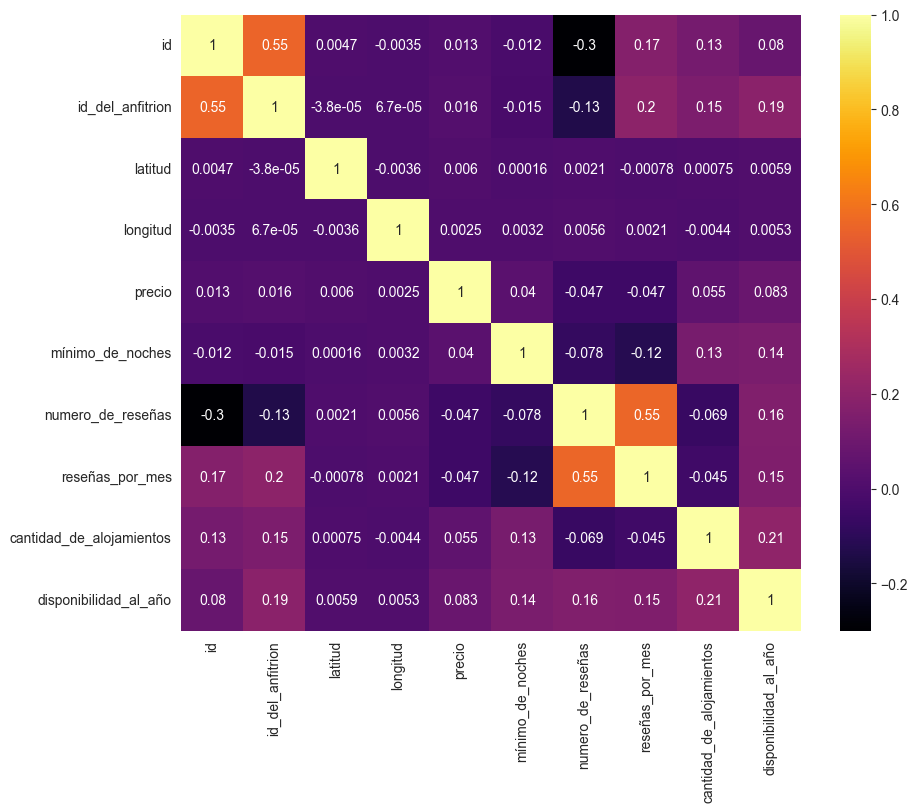

In [55]:
corr_mat=df_numeric.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, cmap='inferno')
plt.show()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47532 entries, 0 to 47531
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                47532 non-null  int64  
 1   id                        47532 non-null  int64  
 2   nombre_del_alojamiento    47532 non-null  object 
 3   id_del_anfitrion          47532 non-null  int64  
 4   nombre_del_anfitrion      47532 non-null  object 
 5   nombre_de_la_ciudad       47532 non-null  object 
 6   vecindario                47532 non-null  object 
 7   latitud                   47532 non-null  float64
 8   longitud                  47532 non-null  float64
 9   tipo_de_cuarto            47532 non-null  object 
 10  precio                    47532 non-null  int64  
 11  mínimo_de_noches          47532 non-null  int64  
 12  numero_de_reseñas         47532 non-null  float64
 13  última_reseña             47532 non-null  object 
 14  reseña

In [57]:
df['nombre_de_la_ciudad'].unique()

array(['Brooklyn', 'Manhattan', 'Sin dato', 'Queens', 'Staten Island',
       'Bronx'], dtype=object)

In [58]:
df['vecindario'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Valor Desconocido',
       'Crown Heights', 'Park Slope', 'Windsor Terrace', 'Inwood',
       'East Village', 'Greenpoint', 'Bushwick', 'Flatbush',
       'Lower East Side', 'Prospect-Lefferts Gardens', 'Long Island City',
       'Kips Bay', 'SoHo', 'Chelsea', 'Upper East Side',
       'Prospect Heights', 'Washington Heights', 'Woodside',
       'Brooklyn Heights', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'Carroll Gardens',
       'St. George', 'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Roosevelt Island', 'Greenwich Village',
       'Little Italy', 'East Flatbush', 'Tompkinsville', 'Astoria',
 

Precio predicho para Private room en Clinton Hill: 144.5


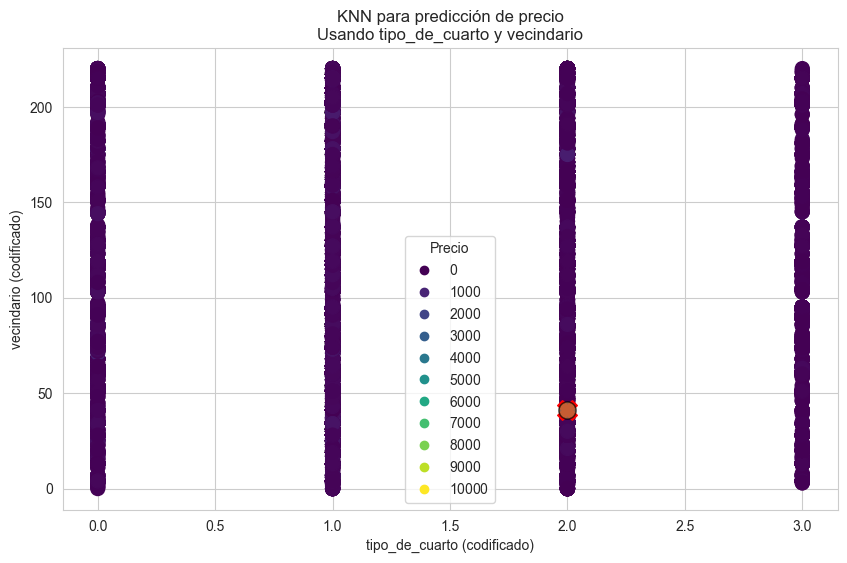

In [59]:
df = pd.read_csv("df_limpio.csv")

label_tipo = LabelEncoder()
label_vecindario = LabelEncoder()

df["tipo_de_cuarto_encoded"] = label_tipo.fit_transform(df["tipo_de_cuarto"])
df["vecindario_encoded"] = label_vecindario.fit_transform(df["vecindario"])

X = df[["tipo_de_cuarto_encoded", "vecindario_encoded"]].values

y = df["precio"].values
model = KNeighborsRegressor(n_neighbors=2)
model.fit(X, y)
tipo_prueba = "Private room"
vecindario_prueba = "Clinton Hill"

test_point = np.array([[
    label_tipo.transform([tipo_prueba])[0],
    label_vecindario.transform([vecindario_prueba])[0]
]])

pred = model.predict(test_point)
print(f"Precio predicho para {tipo_prueba} en {vecindario_prueba}: {pred[0]}")

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    X[:, 0], X[:, 1], c=y, cmap='viridis', s=100
)

plt.scatter(test_point[0, 0], test_point[0, 1], c='red', s=200, marker='X')

neighbors_idx = model.kneighbors(test_point, return_distance=False)
for i in neighbors_idx[0]:
    plt.scatter(X[i, 0], X[i, 1], edgecolor='black', s=150, alpha=0.5)

plt.title("KNN para predicción de precio\nUsando tipo_de_cuarto y vecindario")
plt.xlabel("tipo_de_cuarto (codificado)")
plt.ylabel("vecindario (codificado)")
plt.legend(*scatter.legend_elements(), title="Precio")
plt.show()
